***Проект "Анализ данных мобильного приложения GoFast"***

**Описание проекта:**
В рамках данного проекта мы проведем анализ данных мобильного приложения GoFast, которое предоставляет услуги по аренде электросамокатов. Мы исследуем данные о пользователях, поездках и подписках, чтобы выявить закономерности и тенденции в их поведении.

**Цель проекта:**
Целью проекта является выявление ключевых метрик и закономерностей в использовании сервиса GoFast.

**Описание данных:**

users_go.csv: данные о пользователях приложения.

rides_go.csv: данные о поездках на электросамокатах.

subscriptions_go.csv: данные о подписках пользователей.


**План работы:**

1. Загрузка данных
    
    1.1 Считаем CSV-файлы с данными и сохраним их в датафреймы.
    
    1.2 Выведем первые строки каждого набора данных и изучим общую информацию о каждом датафрейме.


2. Предобработка данных
    
    2.1 Приведем столбец с датой к типу datetime.
    
    2.2 Создадим новый столбец с номером месяца на основе столбца с датой.
    
    2.3 Проверим наличие пропущенных значений и дубликатов в данных и обработаем их.


3. Исследовательский анализ данных

    - Опишем и визуализируем общую информацию о пользователях и поездках, включая частоту встречаемости городов, соотношение пользователей с подпиской и без подписки, возраст пользователей, расстояние и продолжительность поездок.


4. Объединение данных
    
    4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм с помощью метода merge.
    
    4.2 Создадим два датафрейма с данными о пользователях с подпиской и без подписки.


5. Подсчет выручки
    
    5.1 Создадим датафрейм с агрегированными данными о поездках, вычислим суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
    
    5.2 Добавим в датафрейм столбец с помесячной выручкой, которую принес каждый пользователь.


6. Проверка гипотез
    
    6.1 Проверим гипотезу о том, тратят ли пользователи с подпиской больше времени на поездки.
    
    6.2 Проверим гипотезу о том, что среднее расстояние, преодоленное пользователями с подпиской за одну поездку, не превышает определенное значение.
    
    6.3 Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.
    
    6.4 Проверим гипотезу о снижении количества обращений в техподдержку после обновления серверов.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

#### Шаг 1. Загрузка данных

In [2]:
users_table = pd.read_csv('/datasets/users_go.csv')
rides_table = pd.read_csv('/datasets/rides_go.csv')
subscriptions_table = pd.read_csv('/datasets/subscriptions_go.csv')

display(users_table.head())
display(rides_table.head())
display(subscriptions_table.head())

users_table.info()
print('')
rides_table.info()
print('')
subscriptions_table.info()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   C

1. На первой таблице мы выидим ID пользователя, его имя, возраст, город и тип подписки.
2. На второй таблице мы видим поездки, которые совершил пользователь с определенным ID, а именно дистанцию, длительность и дату поездки.
3. Третья таблица показывает информацию о тарифах - цена поездки в минутах, цена старта поездки, а также цена самой подписки на сервис. 

Из информации о датафреймах можем сделать вывод о том, что нужно поменять некоторые типы данных в столбцах (date во второй таблице).

#### Шаг 2. Предобработка данных

In [3]:
rides_table['date'] = pd.to_datetime(rides_table['date'])
rides_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Поменяем тип данных в столбце date и выведем на экран информацию о датафрейме.
Как мы видим, все поменялось.

In [4]:
rides_table['month'] = rides_table['date'].dt.month
print(rides_table['date'].dt.year.unique())
display(rides_table.head())

[2021]


,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Столбец создан! Также мы убедились в том, что в датафрейме отсутствуют данные за другие года (в нём только статистика за 2021 год). Перейдем к проверке на дубликаты и пропущенные значения - проверим первые два датафрейма, так как в таблице с типом подписки у нас всего лишь две строки.

In [5]:
rides_table.duplicated().sum()

0

In [6]:
users_table.duplicated().sum()

31

In [7]:
users_table.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [8]:
rides_table.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

Из результатов проверки мы видим, что пропущенные значения отсутствуют, а явные дубликаты есть лишь в таблице users_table. Избавимся от них.

In [9]:
users_table = users_table.drop_duplicates()
users_table.duplicated().sum()

0

Мы избавились от явных дубликатов, а также поменяли типы данных там, где это необходимо. Также мы создали столбец с номером месяца в таблице с поездками для удобства последующего анализа. 

#### Шаг 3. Исследовательский анализ данных

Визуализируем данные из таблиц. Сперва проверим частоту встречаемости городов. 

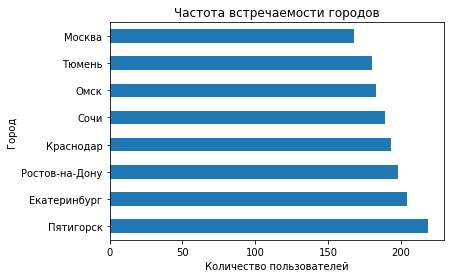

In [10]:
users_table['city'].value_counts().plot.barh()

plt.xlabel('Количество пользователей')
plt.ylabel('Город')
plt.title('Частота встречаемости городов')

plt.show()

Добавим более точные значения

In [11]:
display(users_table['city'].value_counts(ascending=True))

Москва            168
Тюмень            180
Омск              183
Сочи              189
Краснодар         193
Ростов-на-Дону    198
Екатеринбург      204
Пятигорск         219
Name: city, dtype: int64

Как мы видим, меньше всего пользователей из Москвы, а наибольшее их число - в Пятигорске. Значения между остальными городами отличаются не так значительно.

Перейдем к соотношению пользователей с подпиской и без подписки.

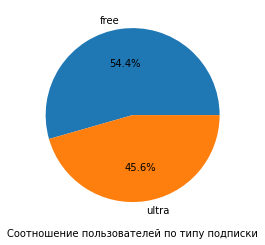

In [12]:
plt.pie(users_table['subscription_type'].value_counts(),  labels=['free', 'ultra'], autopct='%1.1f%%')
plt.xlabel('Соотношение пользователей по типу подписки')
plt.show()

Как мы видим - больше половины пользователей не имеют платной подписки на сервис. Перейдем к возрастам пользователей. 

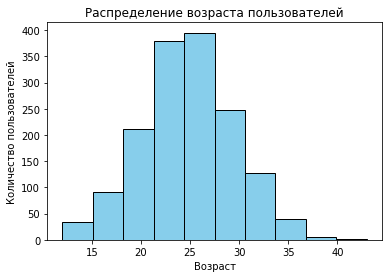

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [13]:
plt.hist(users_table['age'], bins=10, color='skyblue', edgecolor='black')

plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.title('Распределение возраста пользователей')

plt.show()

users_table['age'].describe()

Как мы видим - большинство пользователей сервиса имеют возраст от 20 до 30 лет, после 30 лет видим заметное снижение количества пользователей. 
Перейдем к анализу расстояния, которое преодолел пользователь. 

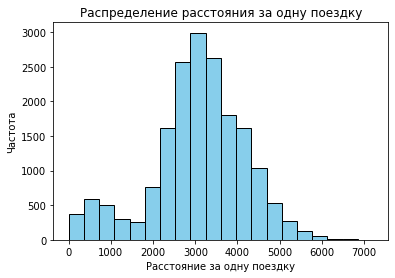

In [14]:
plt.hist(rides_table['distance'], bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Расстояние за одну поездку')
plt.ylabel('Частота')
plt.title('Распределение расстояния за одну поездку')

plt.show()

Как мы видим, в начале есть небольшой всплеск - это может говорить о том, что некоторая категория пользователей использует сервис для совершения коротких поездок (до 1км), в среднем, сервис используется для совершения поездок длиной около 3 км.

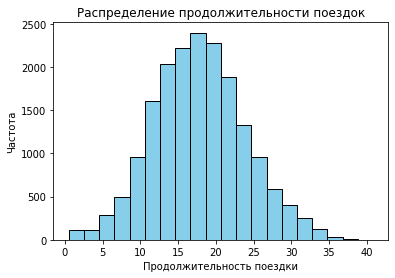

In [15]:
plt.hist(rides_table['duration'], bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Продолжительность поездки')
plt.ylabel('Частота')
plt.title('Распределение продолжительности поездок')

plt.show()

На графике видно нормальное распределение, без выбросов. В среднем, поездка у пользователя занимает от 15 до 20 минут, заметное снижение времени поездки начинается после 25 минут.

**Промежуточный вывод.** Визуализировав обработанные данные можно сказать, что каких-либо заметных аномалий на графиках обнаружить не удалось. Также визуализация дала нам понять определенную информацию о сервисе (распределение продолжительности поездки, расстояния, возраста, пользователей по городам, а также удалось узнать соотношение пользователей с подпиской и без).

#### Шаг 4. Объединение данных

In [16]:
merged_data = users_table.merge(rides_table)

merged_data = merged_data.merge(subscriptions_table)

merged_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


Проверим наши данные после объединения. 

In [17]:
print('Количество записей в users_table:', len(users_table))
print('Количество записей в rides_table:', len(rides_table))
print('Количество записей в subscriptions_table:', len(subscriptions_table))
print('Количество записей в объединенной таблице:', len(merged_data))
print(f'Пропуски в объединенноё таблице: \n{merged_data.isna().sum()}')
print(f'Дубликаты в объединенноё таблице: {merged_data.duplicated().sum()}')

Количество записей в users_table: 1534
Количество записей в rides_table: 18068
Количество записей в subscriptions_table: 2
Количество записей в объединенной таблице: 18068
Пропуски в объединенноё таблице: 
user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64
Дубликаты в объединенноё таблице: 0


Как мы видим, число записей в таблице совпадает с количеством поездок, также были проведены проверки на дубликаты и пропущенные значения, которые ничего не выявили.

Мы объединили датафреймы, теперь попробуем создать еще два датафрейма, чтобы вывести пользователей с подпиской и без неё.

In [18]:
users_without_subscription = merged_data[merged_data['subscription_type'] == 'free']

users_with_subscription = merged_data[merged_data['subscription_type'] == 'ultra']

display(users_with_subscription.head())
display(users_without_subscription.head())

print('Количество записей в обоих датафреймах', len(users_with_subscription) + len(users_without_subscription))

print('Количество записей в объединенной таблице:', len(merged_data))

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


Количество записей в обоих датафреймах 18068
Количество записей в объединенной таблице: 18068


Отлично, все совпадает. 
Визуализируем полученные датафреймы.

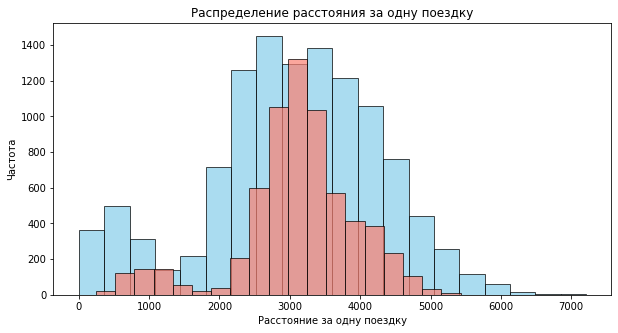

In [19]:
plt.figure(figsize=(10, 5))

plt.hist(users_without_subscription['distance'], bins=20, color='skyblue', edgecolor='black', alpha=0.7, label='Без подписки')

plt.hist(users_with_subscription['distance'], bins=20, color='salmon', edgecolor='black', alpha=0.7, label='С подпиской')

plt.xlabel('Расстояние за одну поездку')
plt.ylabel('Частота')
plt.title('Распределение расстояния за одну поездку')

plt.show()

In [20]:
print(users_without_subscription['distance'].describe())
print('')
print(users_with_subscription['distance'].describe())

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64


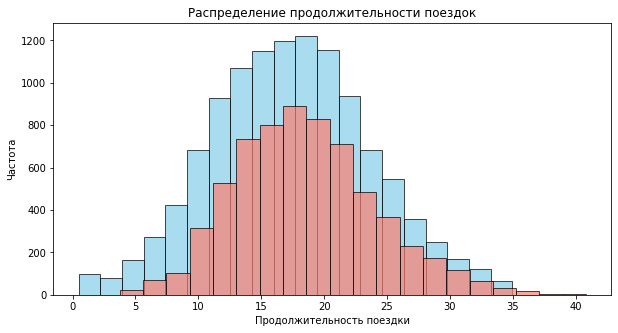

In [21]:
plt.figure(figsize=(10, 5))

plt.hist(users_without_subscription['duration'], bins=20, color='skyblue', edgecolor='black', alpha=0.7, label='Без подписки')

plt.hist(users_with_subscription['duration'], bins=20, color='salmon', edgecolor='black', alpha=0.7, label='С подпиской')

plt.xlabel('Продолжительность поездки')
plt.ylabel('Частота')
plt.title('Распределение продолжительности поездок')

plt.show()

In [22]:
print(users_without_subscription['duration'].describe())
print('')
print(users_with_subscription['duration'].describe())

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64


На гистограммах видно, что количество поездок у пользователей без подписки намного больше, чем у пользователей с подпиской. Однако распределение у них схоже в некоторых местах,например, в длительности поездок - медиана не сильно отличается. 
Но также стоит обратить внимание на начало графиков - очень короткие поездки (до 1 км и меньше 10 минут) предпочитают пользователи без подписки.
Также стоит обратить внимание на первый график с дистанцией поездок, местами значения отличаются разительно, например, в отметке 2км, 5км. Видно чёткий пик у пользователей с подпиской в районе 3 км, тогда как у пользователей без подписки распределение, скорее, похоже на плато.

#### Шаг 5. Подсчёт выручки

In [23]:
merged_data['duration'] = np.ceil(merged_data['duration']) 
aggregated_data = merged_data.groupby(['user_id', 'month']).agg({
    'distance': 'sum',
    'duration': 'sum',
     'date': 'count',
    'start_ride_price': 'sum',
    'subscription_fee': 'first', 
    'minute_price': 'first' }).reset_index()
aggregated_data.rename(columns={
    'distance': 'total_distance',
    'duration': 'total_duration',
    'date': 'trip_count',
    'start_ride_price': 'start_ride_price_sum' 
}, inplace=True)

aggregated_data

,user_id,month,total_distance,total_duration,trip_count,start_ride_price_sum,subscription_fee,minute_price
0,1,1,7027.511294,42.0,2,0,199,6
1,1,4,754.159807,7.0,1,0,199,6
2,1,8,6723.470560,46.0,2,0,199,6
3,1,10,5809.911100,32.0,2,0,199,6
4,1,11,7003.499363,56.0,3,0,199,6
...,...,...,...,...,...,...,...,...
11326,1534,6,3409.468534,26.0,2,100,0,8
11327,1534,8,7622.453034,48.0,2,100,0,8
11328,1534,9,4928.173852,23.0,1,50,0,8
11329,1534,11,13350.015305,78.0,4,200,0,8


Мы суммировали все поездки за каждый месяц. В итоге мы получили общую дистанцию, общее время и количество поездок, которые совершил пользователь за определённый месяц. Теперь рассчитаем месячную выручку с каждого пользователя.

In [24]:
aggregated_data['monthly_revenue'] = (aggregated_data['start_ride_price_sum'] +
                                      aggregated_data['total_duration'] * aggregated_data['minute_price'] +
                                      aggregated_data['subscription_fee'])
aggregated_data

,user_id,month,total_distance,total_duration,trip_count,start_ride_price_sum,subscription_fee,minute_price,monthly_revenue
0,1,1,7027.511294,42.0,2,0,199,6,451.0
1,1,4,754.159807,7.0,1,0,199,6,241.0
2,1,8,6723.470560,46.0,2,0,199,6,475.0
3,1,10,5809.911100,32.0,2,0,199,6,391.0
4,1,11,7003.499363,56.0,3,0,199,6,535.0
...,...,...,...,...,...,...,...,...,...
11326,1534,6,3409.468534,26.0,2,100,0,8,308.0
11327,1534,8,7622.453034,48.0,2,100,0,8,484.0
11328,1534,9,4928.173852,23.0,1,50,0,8,234.0
11329,1534,11,13350.015305,78.0,4,200,0,8,824.0


Итого, перед нами сборная таблица, в ней показана *агрегированная информация о пользователях* - дистанция, длительность, количество поездок и денежных единиц за определенный месяц пользования сервисом. *Значения длительности поездок были округлены* для более точного подсчёта выручки.

#### Шаг 6. Проверка гипотез

Теперь проверим несколько гипотез, которые выдвинул отдел маркетинга. 
Итак первая **нулевая гипотеза:** пользователи с подпиской тратят столько же времени на поездки, сколько пользователи без подписки. 

Проверять мы её будем в пользу **альтернативной гипотезы**: пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.  

Проверим данную гипотезу с помощью t-теста. 

In [25]:
duration_with_subscription = merged_data[merged_data['subscription_type'] == 'ultra']['duration']
duration_without_subscription = merged_data[merged_data['subscription_type'] == 'free']['duration']

print(f'Среднее выборки пользователей с подпиской: {np.mean(duration_with_subscription)}')
print(f'Среднее выборки пользователей без подписки: {np.mean(duration_without_subscription)}')


results = st.ttest_ind(duration_with_subscription, duration_without_subscription, alternative = 'greater')

alpha = .05


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: продолжительность поездок пользователей с подпиской больше, чем пользователей без подписки.')
else:
    print('Не отвергаем нулевую гипотезу: нет статистически значимых различий в продолжительности поездок для пользователей с подпиской и без подписки.')

Среднее выборки пользователей с подпиской: 19.037692307692307
Среднее выборки пользователей без подписки: 17.890992392807746
p-значение: 2.4959453720736625e-34
Отвергаем нулевую гипотезу: продолжительность поездок пользователей с подпиской больше, чем пользователей без подписки.


Отвергнув нулевую гипотезу, мы видим, что пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки. 

Перейдем к проверке следующих гипотез. 

**Нулевая гипотеза:** среднее расстояние, которое проезжают пользователи с подпиской не больше 3130 метров.

**Альтернативная гипотеза:** среднее расстояние, которое проезжают пользователи с подпиской больше 3130 метров.

In [26]:
distance_with_subscription = merged_data[merged_data['subscription_type'] == 'ultra']['distance']

print(f'Среднее выборки для пользователей с подпиской: {np.mean(distance_with_subscription)}')

results = st.ttest_1samp(distance_with_subscription, 3130, alternative = 'greater')

alpha = .05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров.')
else:
    print('Не отвергаем нулевую гипотезу: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.')

Среднее выборки для пользователей с подпиской: 3115.4453880370247
p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.


Не отвергая нулевую гипотезу, мы выяснили, что **пользователи с подпиской в среднем проезжают не больше (и немногим меньше) 3130 метров**. Перейдем к проверке других гипотез. 

**Нулевая гипотеза:** помесячная выручка от пользователей с подпиской равна выручке пользователей без подписки. 

**Альтернативная гипотеза:** помесячная выручка от пользователей с подпиской больше, чем помесячная выручка от пользователей без подписки. 

In [27]:
aggregated_data['subscription_type'] = merged_data['subscription_type']

monthly_revenue_with_subscription = aggregated_data[aggregated_data['subscription_type'] == 'ultra']['monthly_revenue']
monthly_revenue_without_subscription = aggregated_data[aggregated_data['subscription_type'] == 'free']['monthly_revenue']

print(f'Среднее выборки пользователей с подпиской: {np.mean(monthly_revenue_with_subscription)}')
print(f'Среднее выборки пользователей без подписки: {np.mean(monthly_revenue_without_subscription)}') 

results = st.ttest_ind(monthly_revenue_with_subscription, monthly_revenue_without_subscription, alternative = 'greater')

alpha = .05


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: месячная выручка у пользователей с подпиской больше, чем у пользователей без подписки .')
else:
    print('Не отвергаем нулевую гипотезу: нет статистически значимых различий в месячной выручке для пользователей с подпиской и без подписки.')

Среднее выборки пользователей с подпиской: 352.6776923076923
Среднее выборки пользователей без подписки: 328.34527013040776
p-значение: 3.819490444237055e-17
Отвергаем нулевую гипотезу: месячная выручка у пользователей с подпиской больше, чем у пользователей без подписки .


Видим такую же картину, как и в первом случае - средние значения у обоих выборок у нас отличается, то есть пользователи с подпиской тратят больше денег, чем пользователи без подписки.

Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. 
Для проверки **односторонней** гипотезы о том, что обновление серверов значительно снизило количество обращений в техподдержку, мы можем использовать **парный t-тест (paired t-test, метод ttest_rel)**. Этот тест позволяет сравнить средние значения двух связанных выборок, в нашем случае - количество обращений до и после обновления серверов для каждого пользователя.

*Но, к сожалению, данные ещё не были предоставлены.*

**Выводы**
1. Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.
2. Пользователи с подпиской в среднем проезжают не больше (и немногим меньше) 3130 метров
3. Пользователи с подпиской тратят больше денег, чем пользователи без подписки.

#### Шаг 7. Распределения

Для поиска подходящего значения параметра N (количество промокодов) мы можем использовать метод кумулятивной функции распределения (CDF). Это позволит нам понять, какое минимальное количество промокодов нужно, чтобы минимум 100 существующих клиентов продлили подписку.

In [28]:
from scipy.stats import binom

p = 0.1
success_rate = 0.1
failure_rate = 0.05 
subscribers = 100

N = 1
while binom.cdf(subscribers - 1, N, p) > failure_rate:
    N += 1

print(f'Минимальное количество промокодов, которые нужно разослать: {N}')


Минимальное количество промокодов, которые нужно разослать: 1161


Перейдем к решению второй задачи. Воспользуемся методом нормальной апроксимации. Зададим значения, диапазон значений и распределение вероятностей. После построим график и найдем вероятнсть того, что уведомление откроют не более 399,5 тыс. пользователей.

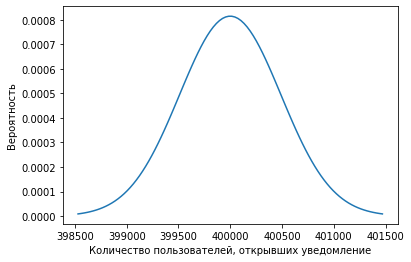

In [29]:
n = 1000000
p = 0.4
mu = n * p
sigma = np.sqrt(n * p * (1 - p))

x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
y = st.norm(mu, sigma).pdf(x)

plt.plot(x, y)
plt.xlabel('Количество пользователей, открывших уведомление')
plt.ylabel('Вероятность')

plt.show()

In [30]:
cdf = st.norm(mu, sigma).cdf(399500)
print(f'Вероятность: {cdf: .4f}')

Вероятность:  0.1537


# Итоговый вывод
1. Для анализа были рассмотрены данные о пользователях, поездках и подписках.

2. Пропущенных значений в данных не обнаружено, но были выявлены явные дубликаты в таблице пользователей. Они были успешно удалены.

3. В ходе исследовательского анализа данных были получены следующие результаты:
- Наибольшее количество пользователей проживает в городе Пятигорск, меньше всего - в Москве. Разница в количестве пользователей между городами не является значительной.
- Больше половины пользователей не имеют платной подписки на сервис.
- Большинство пользователей сервиса находятся в возрастной группе от 20 до 30 лет, после 30 лет количество пользователей снижается.
- Среднее расстояние поездки составляет около 3 км, а среднее время поездки - от 15 до 20 минут.

4. Объединив данные о пользователях, поездках и подписках, мы суммировали все поездки за каждый месяц, получив общую дистанцию, время и количество поездок для каждого пользователя. В результате анализа данных о поездках пользователей с подпиской и без подписки можно сделать следующие выводы:

- Количество поездок у пользователей без подписки значительно превышает количество поездок у пользователей с подпиской. Это может свидетельствовать о том, что пользователи без подписки чаще пользуются сервисом аренды самокатов.

- Распределение длительности поездок у обеих категорий пользователей схоже, что указывает на то, что в целом пользователи, вне зависимости от наличия подписки, предпочитают совершать поездки примерно одинаковой длительности.

- Пользователи без подписки чаще совершают очень короткие поездки, в то время как у пользователей с подпиской не наблюдается таких крайних значений.

- Распределение дистанции поездок также различается: у пользователей с подпиской наблюдается чёткий пик в районе 3 км, в то время как у пользователей без подписки распределение более равномерное.

5. Из результатов проверки гипотез были получены следующие выводы:
- Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.
- Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, немного меньше 3130 метров.
- Выручка от пользователей с подпиской выше, чем от пользователей без подписки.

В целом, на основе проведенного анализа можно сделать вывод, что пользователи с подпиской являются более выгодными для сервиса аренды самокатов, так как они тратят больше времени на поездки, проезжают более длительные расстояния и приносят больше выручки.




